<a href="https://colab.research.google.com/github/Abdulaziz-Abdullah-Hazazi/test/blob/main/Data_Analysis_Module_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

listings_data_path = "Listings.csv"  # Assuming Listings.csv contains listings data
reviews_data_path = "Reviews.csv"    # Assuming Reviews.csv contains reviews data

#load listings dataset
listings = pd.read_csv(listings_data_path, encoding = 'latin', low_memory = False)
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
#privew table reviews
reviews = pd.read_csv(reviews_data_path)
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072.0
1,15383,330103585,2018-09-30,39147453.0
2,16455,329985788,2018-09-30,1125378.0
3,17919,330016899,2018-09-30,172717984.0
4,26827,329995638,2018-09-30,17542859.0


#convert certain columns datatype to categorical data to reduce the memory size
cat_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'district', 'city', 'property_type', 'room_type', 'instant_bookable']
listings[cat_cols] = listings[cat_cols].astype('category')

listings.info()



In [ ]:
#let's check if there are any duplicates in our data
duplicates = listings[listings.duplicated()]
duplicates

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


In [ ]:
#let's check for null values in certain columns
listings.isna().sum()


listing_id                         0
name                              32
host_id                            0
host_since                         0
host_location                      7
host_response_time             13316
host_response_rate             13316
host_acceptance_rate            9242
host_is_superhost                  1
host_total_listings_count          1
host_has_profile_pic               1
host_identity_verified             1
neighbourhood                      1
district                       12844
city                               1
latitude                           1
longitude                          1
property_type                      1
room_type                          1
accommodates                       1
bedrooms                        3042
amenities                          1
price                              1
minimum_nights                     1
maximum_nights                     1
review_scores_rating            3290
review_scores_accuracy          3308
r

In [ ]:
# convert host_since column to datetime type
listings['host_since'] = pd.to_datetime(listings['host_since'])

#add a new column year_month using host_since column
listings['year_month'] = listings["host_since"].dt.to_period('M')
listings.head()



,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,year_month
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2011-12
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2013-11
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2014-07
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2013-12
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2014-12


In [ ]:
#merge listings and reviews dataframes
df  = listings.merge(reviews, how = 'inner', on = 'listing_id')
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,year_month,review_id,date,reviewer_id
0,11963112,Appartement au coeur de Bastille,63894099,2016-03-21,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,2016-03,113624585,2016-11-13,5181594.0
1,13182340,Typical Parisian flat with balcony - rooftop view,11058384,2014-01-06,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,2014-01,113534385,2016-11-13,29310780.0
2,13698157,Cosy Appartment in the Batignolles area,9581424,2013-10-22,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,2013-10,267214493,2018-05-21,148951519.0
3,13698157,Cosy Appartment in the Batignolles area,9581424,2013-10-22,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,2013-10,145014453,2017-04-17,29581998.0
4,13698157,Cosy Appartment in the Batignolles area,9581424,2013-10-22,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,2013-10,223448684,2018-01-01,118729380.0


In [ ]:
# Merge the DataFrames
df = listings.merge(reviews, how='inner', on='listing_id')

# Display the first few rows of the merged DataFrame
print(df.head())

   listing_id                                               name   host_id  \
0    11963112                   Appartement au coeur de Bastille  63894099   
1    13182340  Typical Parisian flat with balcony - rooftop view  11058384   
2    13698157            Cosy Appartment in the Batignolles area   9581424   
3    13698157            Cosy Appartment in the Batignolles area   9581424   
4    13698157            Cosy Appartment in the Batignolles area   9581424   

  host_since                 host_location  host_response_time  \
0 2016-03-21  Paris, Ile-de-France, France                 NaN   
1 2014-01-06  Paris, Ile-de-France, France                 NaN   
2 2013-10-22  Paris, Ile-de-France, France                 NaN   
3 2013-10-22  Paris, Ile-de-France, France                 NaN   
4 2013-10-22  Paris, Ile-de-France, France                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1   

In [ ]:
print("Columns in 'listings' DataFrame:", listings.columns)
print("Columns in 'reviews' DataFrame:", reviews.columns)



Columns in 'listings' DataFrame: Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'year_month'],
      dtype='object')
Columns in 'reviews' DataFrame: Index(['listing_id', 'review_id', 'date', 'reviewer_id'], dtype='object')


In [ ]:
# Assuming you have 'listings' and 'reviews' DataFrames available

# Merge the DataFrames
df = listings.merge(reviews, how='inner', on='listing_id')

# Display the first few rows of the merged DataFrame
print(df.head())

   listing_id                                               name   host_id  \
0    11963112                   Appartement au coeur de Bastille  63894099   
1    13182340  Typical Parisian flat with balcony - rooftop view  11058384   
2    13698157            Cosy Appartment in the Batignolles area   9581424   
3    13698157            Cosy Appartment in the Batignolles area   9581424   
4    13698157            Cosy Appartment in the Batignolles area   9581424   

  host_since                 host_location  host_response_time  \
0 2016-03-21  Paris, Ile-de-France, France                 NaN   
1 2014-01-06  Paris, Ile-de-France, France                 NaN   
2 2013-10-22  Paris, Ile-de-France, France                 NaN   
3 2013-10-22  Paris, Ile-de-France, France                 NaN   
4 2013-10-22  Paris, Ile-de-France, France                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1   

In [ ]:
#add a new column month using date column
df['month'] = pd.to_datetime(df['date']).dt.month
df.info()

df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16257 entries, 0 to 16256
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   16257 non-null  int64         
 1   name                         16257 non-null  object        
 2   host_id                      16257 non-null  int64         
 3   host_since                   16257 non-null  datetime64[ns]
 4   host_location                16218 non-null  object        
 5   host_response_time           0 non-null      float64       
 6   host_response_rate           0 non-null      float64       
 7   host_acceptance_rate         7353 non-null   float64       
 8   host_is_superhost            16257 non-null  object        
 9   host_total_listings_count    16257 non-null  float64       
 10  host_has_profile_pic         16257 non-null  object        
 11  host_identity_verified       16257 non-nu

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,year_month,review_id,date,reviewer_id,month
16247,26613151,Petit Studio Parisien,13220636,2014-03-17,"New York, New York, United States",NaN,NaN,1.0,f,1.0,...,10.0,10.0,10.0,9.0,f,2014-03,470575672,2019-06-16,84335844.0,6
16248,26613151,Petit Studio Parisien,13220636,2014-03-17,"New York, New York, United States",NaN,NaN,1.0,f,1.0,...,10.0,10.0,10.0,9.0,f,2014-03,306014845,2018-08-12,85859534.0,8
16249,27616651,Charmant Studio tout confort centre Paris,97639423,2016-10-02,"Nogent-sur-Marne, Ile-de-France, France",NaN,NaN,1.0,f,1.0,...,10.0,10.0,10.0,9.0,f,2016-10,441570185,2019-04-22,6106562.0,4
16250,27616651,Charmant Studio tout confort centre Paris,97639423,2016-10-02,"Nogent-sur-Marne, Ile-de-France, France",NaN,NaN,1.0,f,1.0,...,10.0,10.0,10.0,9.0,f,2016-10,349933770,2018-11-18,3740088.0,11
16251,28837832,Charmant studio en plein cÃ âur de Paris,189157668,2018-05-12,"Raleigh, North Carolina, United States",NaN,NaN,1.0,t,1.0,...,10.0,10.0,10.0,10.0,t,2018-05,365498527,2019-01-01,111177338.0,1
16252,28837832,Charmant studio en plein cÃ âur de Paris,189157668,2018-05-12,"Raleigh, North Carolina, United States",NaN,NaN,1.0,t,1.0,...,10.0,10.0,10.0,10.0,t,2018-05,356840986,2018-12-09,18858137.0,12
16253,28837832,Charmant studio en plein cÃ âur de Paris,189157668,2018-05-12,"Raleigh, North Carolina, United States",NaN,NaN,1.0,t,1.0,...,10.0,10.0,10.0,10.0,t,2018-05,466424558,2019-06-09,139934350.0,6
16254,28837832,Charmant studio en plein cÃ âur de Paris,189157668,2018-05-12,"Raleigh, North Carolina, United States",NaN,NaN,1.0,t,1.0,...,10.0,10.0,10.0,10.0,t,2018-05,587666407,2020-01-03,82796454.0,1
16255,28837832,Charmant studio en plein cÃ âur de Paris,189157668,2018-05-12,"Raleigh, North Carolina, United States",NaN,NaN,1.0,t,1.0,...,10.0,10.0,10.0,10.0,t,2018-05,561831011,2019-11-10,208783547.0,11
16256,30008970,"Studio au coeur de Paris, ÃÂ cote du cirque ...",683841,2011-06-09,"Teyran, Languedoc-Roussillon, France",NaN,NaN,1.0,f,1.0,...,10.0,10.0,10.0,10.0,f,2011-06,350244157,2018-11-18,15528146.0,11


city
Paris             12002
New York            472
Rome                225
Sydney              180
Rio de Janeiro      144
Cape Town            85
Mexico City          81
Istanbul             55
Bangkok              42
Hong Kong            29
Name: instant_bookable, dtype: int64


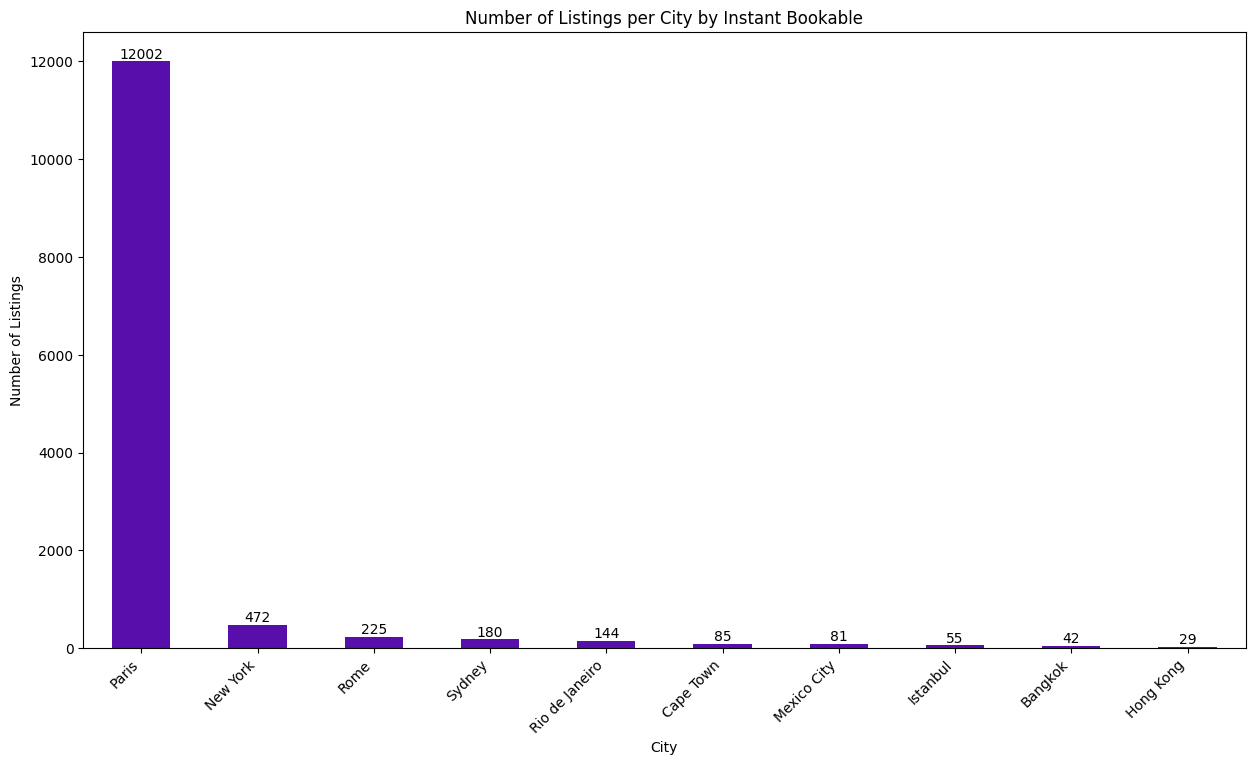

In [ ]:
#grouping the cities by instant bookable and sorting
city_instantbookable = listings.groupby('city')['instant_bookable'].count().sort_values(ascending = False)
print(city_instantbookable)

#plot the graph to see differences between cities by instant bookable
plt.figure(figsize = (15,8))
city_instantbookable.plot(kind = 'bar', color = '#570eab')
plt.title('Number of Listings per City by Instant Bookable')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45, ha = 'right')
for i, v in enumerate(city_instantbookable):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

price                          1.000000
bedrooms                       0.210711
accommodates                   0.180042
review_scores_cleanliness      0.051730
review_scores_rating           0.035787
review_scores_location         0.034233
minimum_nights                 0.024300
review_scores_value            0.005990
review_scores_accuracy        -0.000745
review_scores_checkin         -0.003581
review_scores_communication   -0.018848
maximum_nights                      NaN
Name: price, dtype: float64


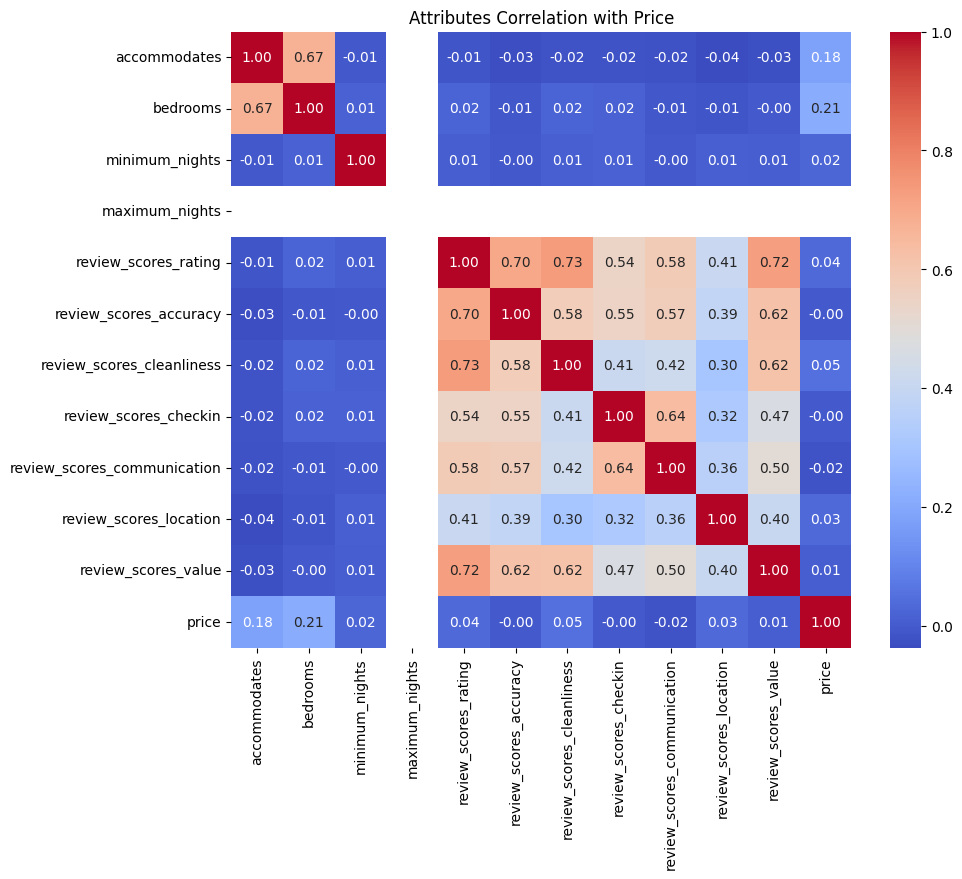

In [ ]:
# create a list with the names of numerical columns data
numerics = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location', 'review_scores_value']
#using the above columns list and price create a new dataframe
numeric_df = listings[numerics + ['price']]

#calculate correlation matrix
correlation_matrix = numeric_df.corr()

#sorting the matrix by price in descending order
price_correlation = correlation_matrix['price'].sort_values(ascending = False)

#print the attributes that have highest correlation with price
print(price_correlation)
#plot the correlation matrix

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Attributes Correlation with Price')
plt.show()



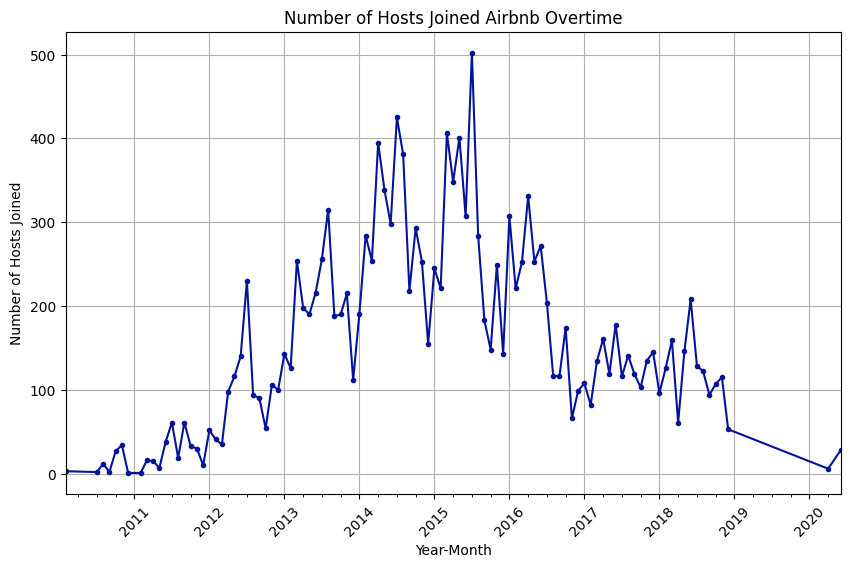

In [ ]:

# count the hosts joined each month
hosts_per_month = df['year_month'].value_counts().sort_index()

#plot the trend of hosts joining
plt.figure(figsize = (10,6))
hosts_per_month.plot(kind = 'line', marker = '.', color = '#051399')
plt.title('Number of Hosts Joined Airbnb Overtime')
plt.xlabel('Year-Month')
plt.ylabel('Number of Hosts Joined')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()



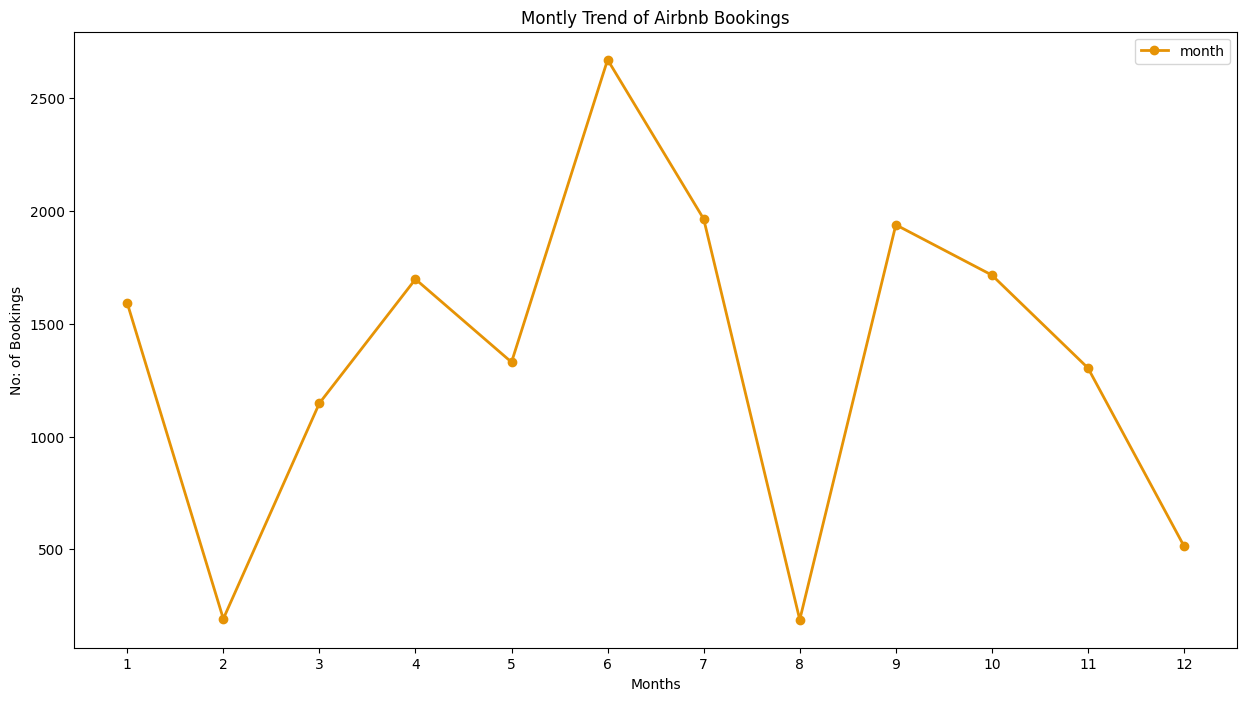

In [ ]:

# let's count the bookings date wise
datewise_bookings = df['date'].value_counts().sort_values(ascending = False)
datewise_bookings
# Plot a graph to find the monthly trend of bookings for airbnb

df.groupby('month').agg('month').count().to_frame().plot(kind = 'line', figsize = (15,8), linewidth=2, marker='o', color = '#e69305')
plt.title('Montly Trend of Airbnb Bookings')
plt.xlabel('Months')
plt.ylabel('No: of Bookings')
plt.xticks(range(1,13))
plt.show()


city
Paris               91.998917
Rome                96.115556
New York           171.974576
Sydney             187.138889
Rio de Janeiro     428.597222
Istanbul           571.490909
Hong Kong         1151.758621
Mexico City       1167.716049
Cape Town         1271.752941
Bangkok           1292.928571
Name: price, dtype: float64


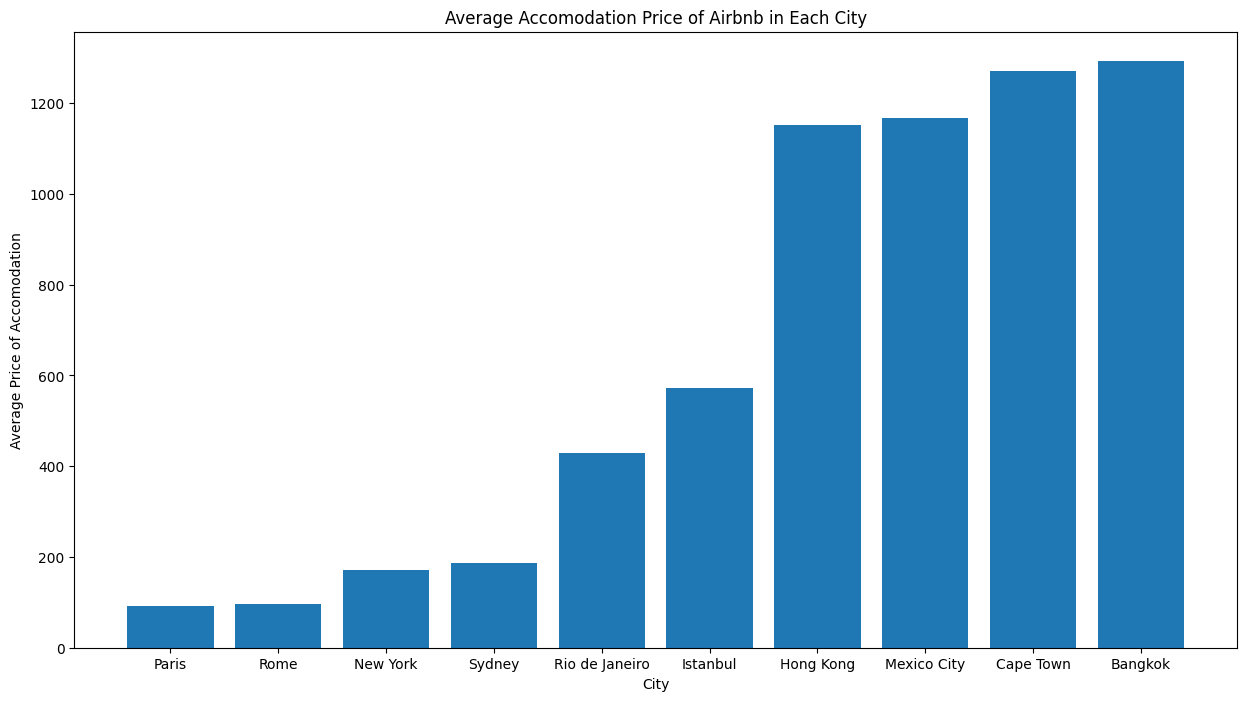

In [ ]:
#calculate the average price for accomodations in each city
avg_price_city = listings.groupby('city')['price'].mean().sort_values()
print(avg_price_city)

#display the graph for value for travel in each city
plt.figure(figsize = (15,8))
plt.bar(avg_price_city.index, avg_price_city.values)
plt.title('Average Accomodation Price of Airbnb in Each City')
plt.ylabel('Average Price of Accomodation')
plt.xlabel('City')
plt.show()

